In [1]:
import numpy as np
import pickle
import torch

from eval_model_plots import *
from synth_data_samples import get_synth_data_sample, get_synth_lake

import random
random.seed(23846)

In [2]:
# Which data
# random
#data_set = 'random'
#size = 5000

# synthetic 3D 1-6
#data_set = 1

# synthetic lake
#data_set = 'synth lakes'
#size=5000
#dim = 48

# Lake
data_set = 'lakes'
size = 6296 
#data_set = 'lakes nn'
#size = 6315
#data_set = 'lakes select'
#size = 100

In [3]:
archetypes = None
if isinstance(data_set, int):
    archetypes, _, _, size, _ = get_synth_data_sample(data_set)
if data_set == 'synth lakes':
    archetypes, _, _, _, _ = get_synth_lake(size,dim)
    #plot_data(archetypes,'Synthetic lake archetypes', projected=False)
    #plot_data(archetypes,'Synthetic lake archetypes', projected=True)
# archetypes
K = np.arange(2,11)
# sets
J = 5
# re-initialisations per set
L = 50
# epochs for training
n_epoch = 500

In [4]:
folder = f'saves/data{data_set}_size{size}_arc{len(K)}_sets{J}_init{L}_epoch{n_epoch}'
file = folder + f'/res_dict_data{data_set}_size{size}_arc{len(K)}_sets{J}_init{L}_epoch{n_epoch}.pkl'
with open(file, 'rb') as f:
        res = pickle.load(f)

In [5]:
print(f'Learning rate: {res["data"]["lr"]}')

Learning rate: {'DAA': 0.05, 'AA': 0.01, 'NMF': 0.1, 'GMM': None}


In [6]:
X = res["data"]["X"]
X_time = None
lake = False
if data_set == 'lakes' or data_set == 'lakes select':
    X_time = res['data']['new_time']
    lake = True
#plot_data(X,data_set, projected=False, X_time = X_time, lake=lake)
#plot_data(X,data_set, projected=True, X_time = X_time, lake=lake)

In [7]:
res.keys()

dict_keys(['data', 'DAA', 'AA', 'NMF', 'GMM'])

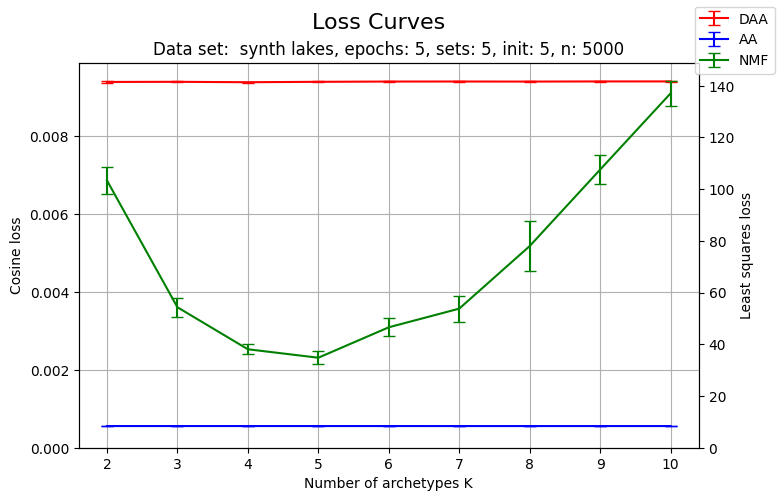

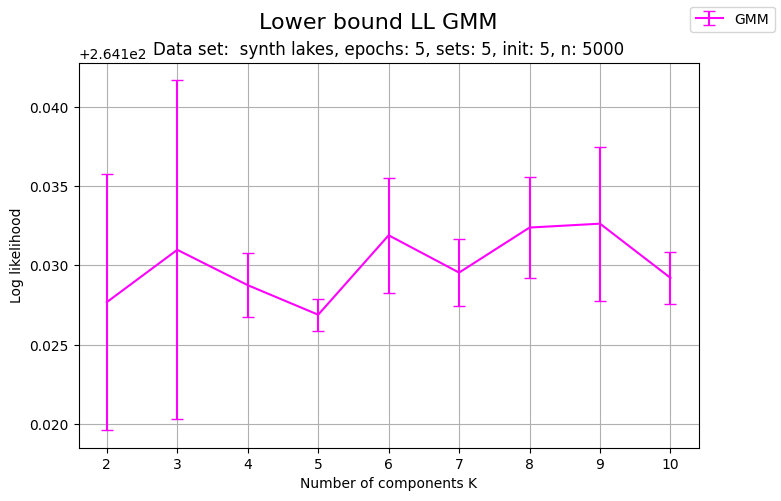

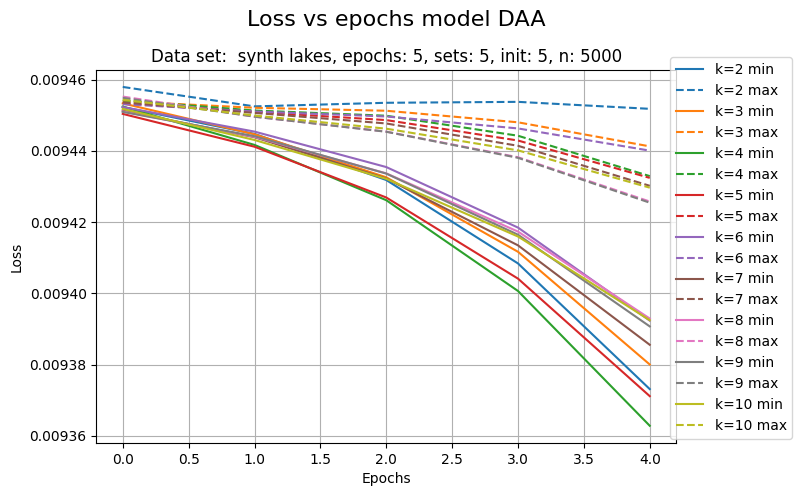

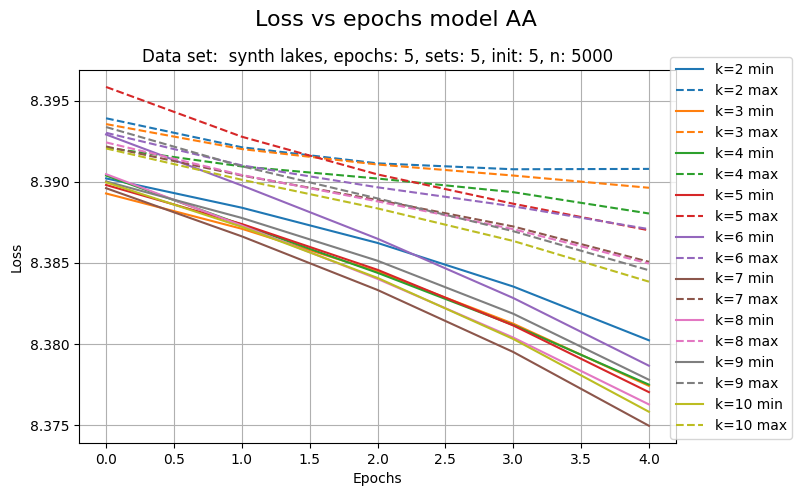

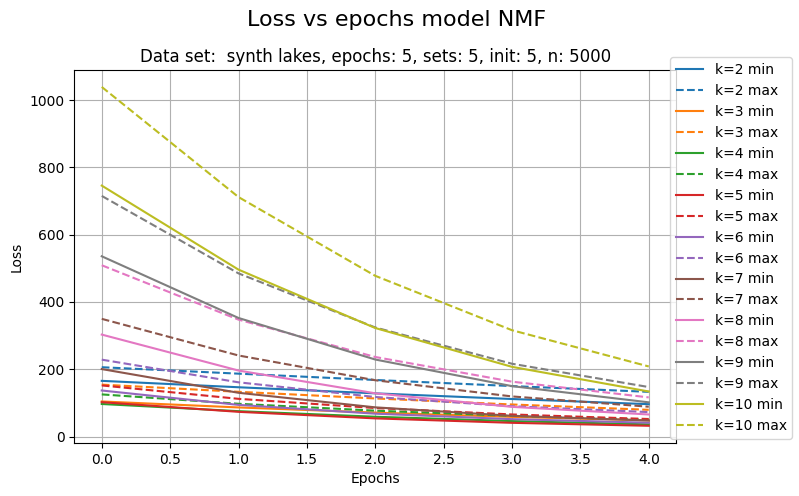

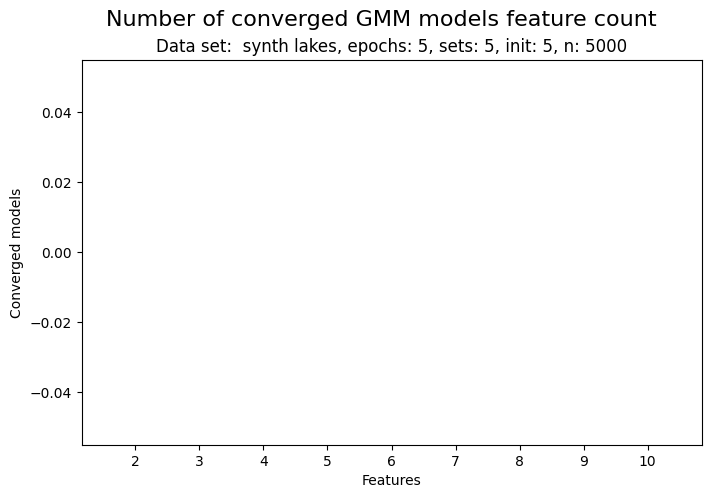

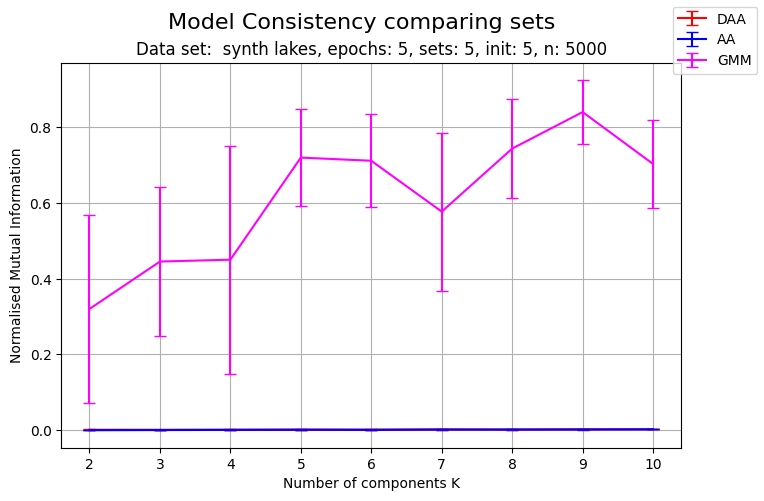

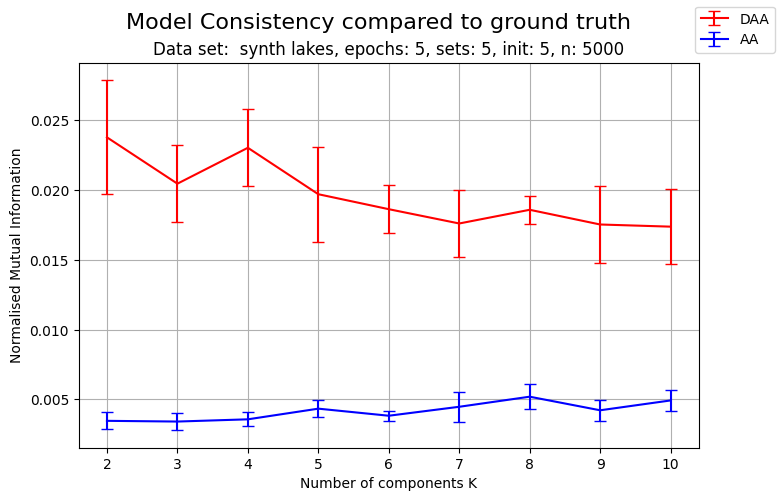

data is not 3d, no 3d-sphere plots created
not lake data, archetypes not saved


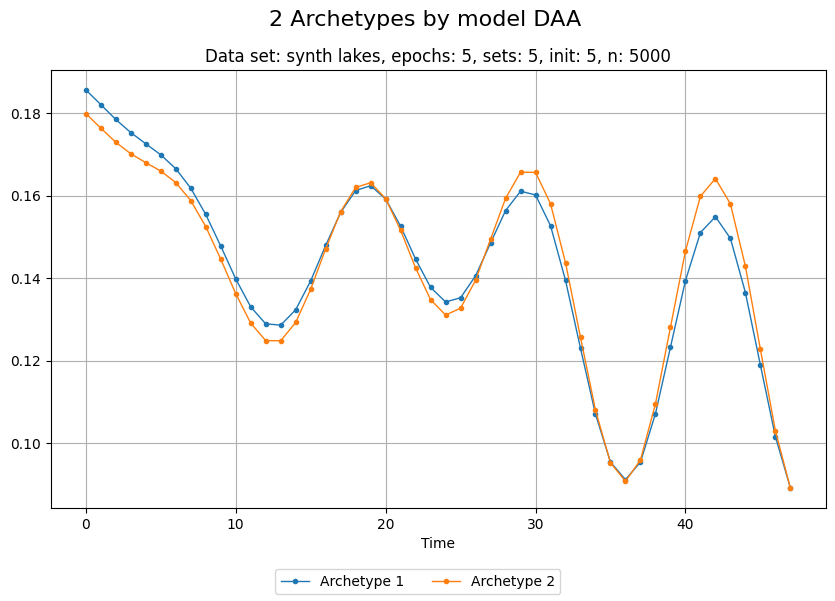

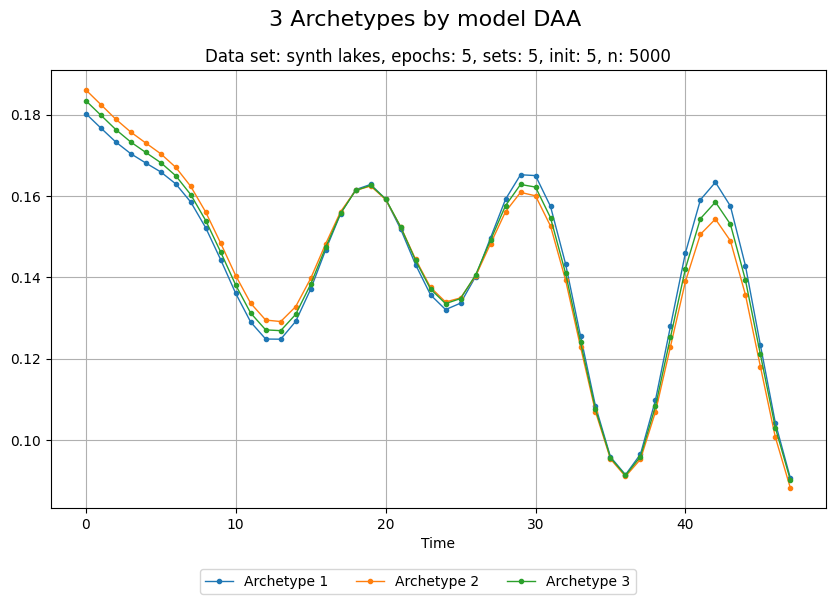

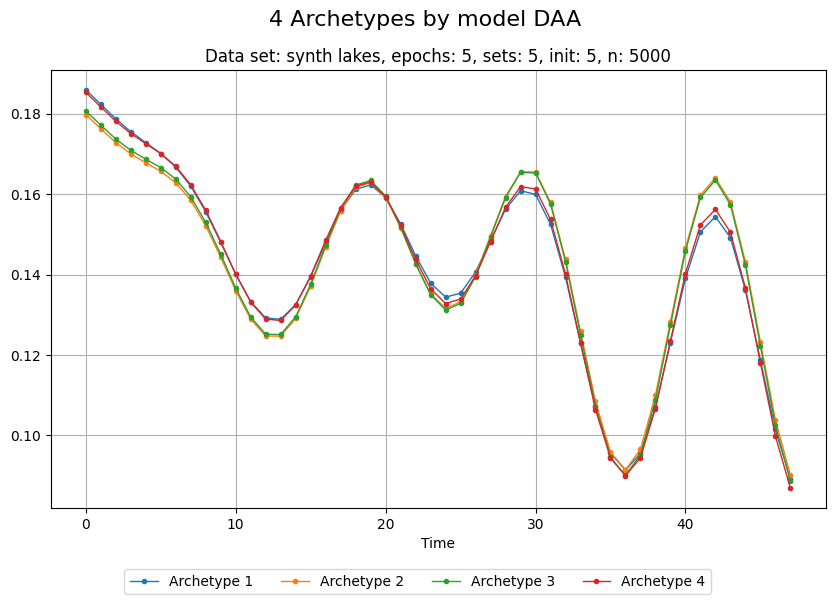

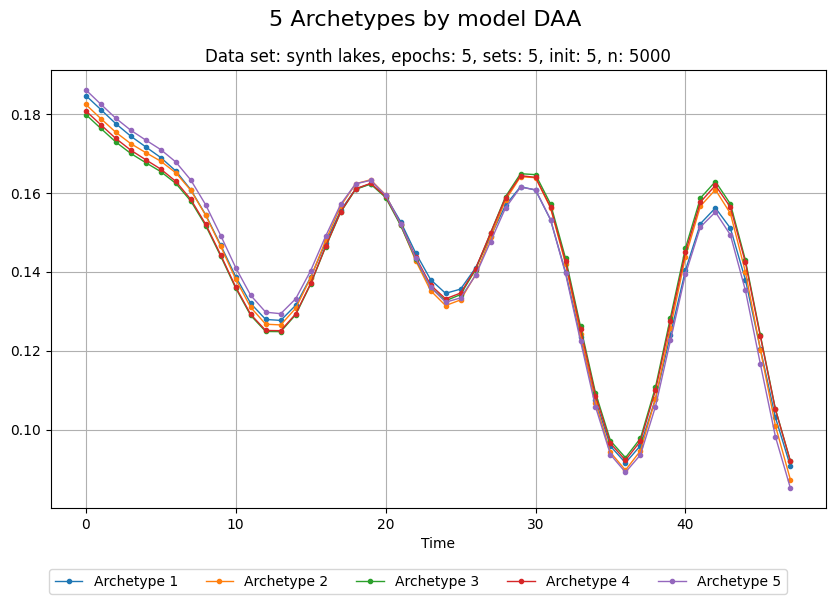

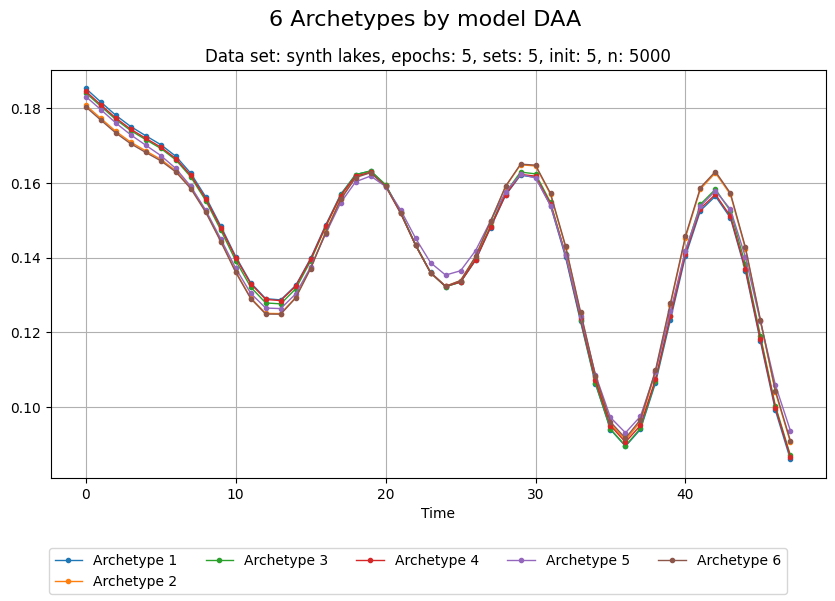

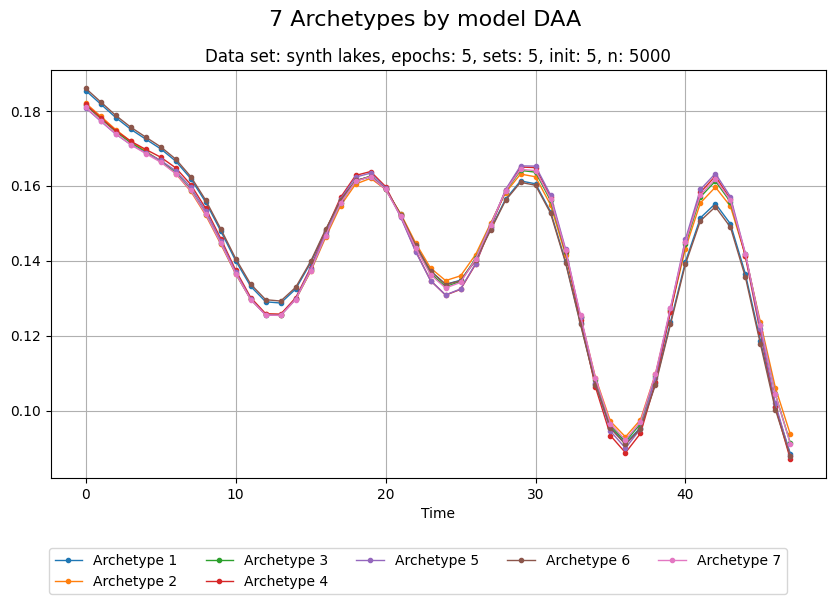

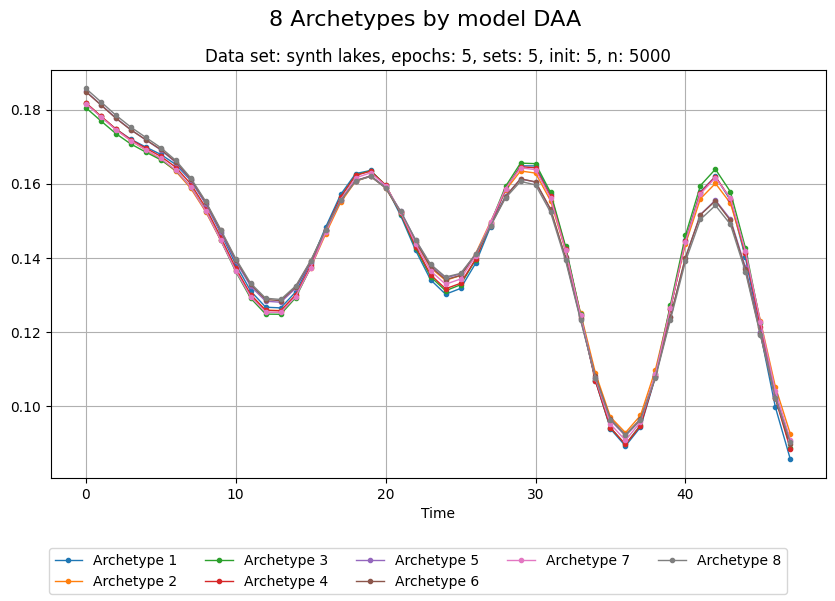

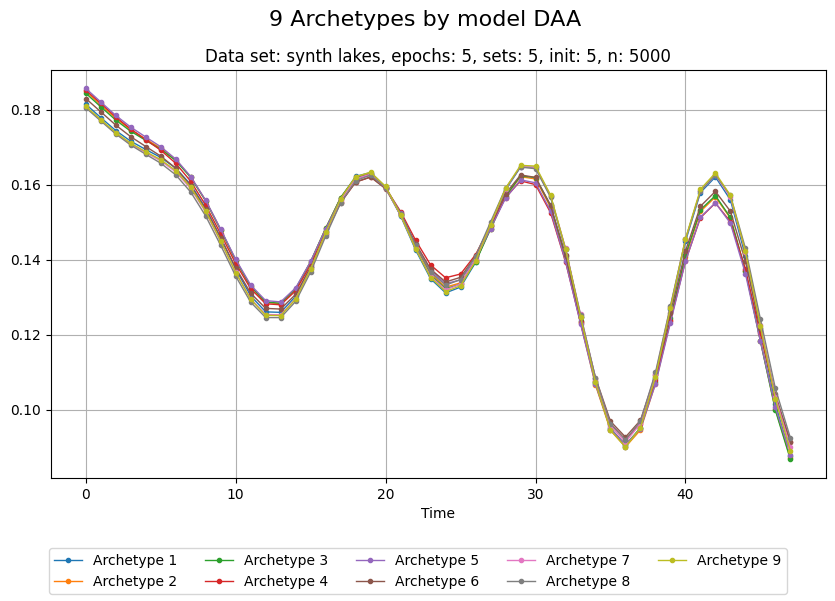

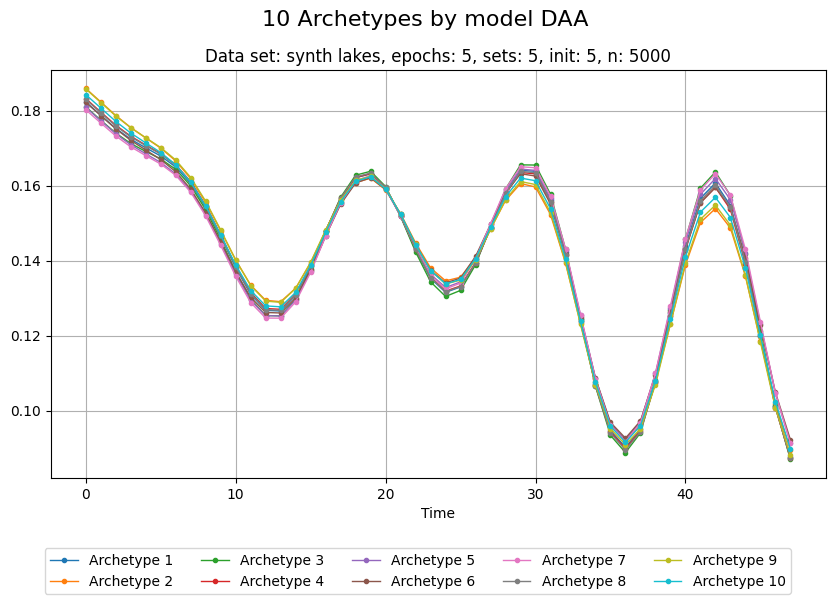

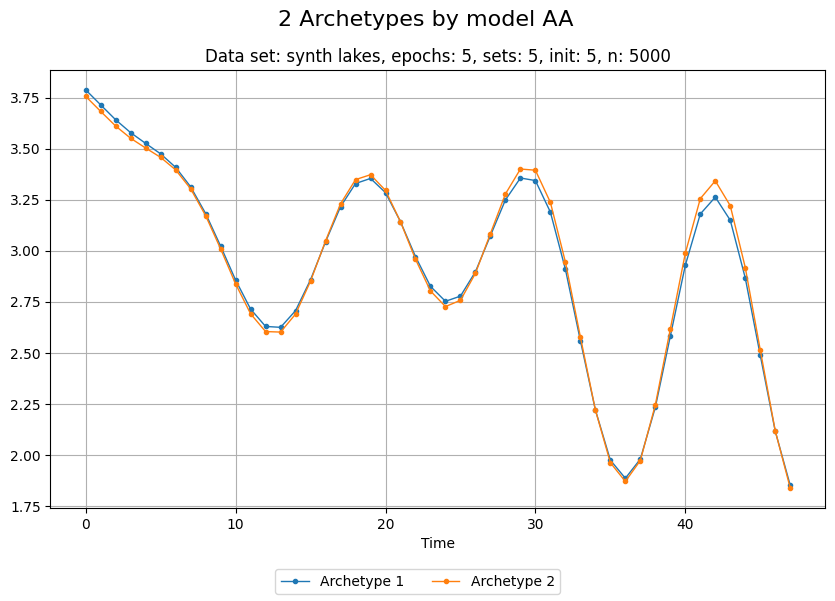

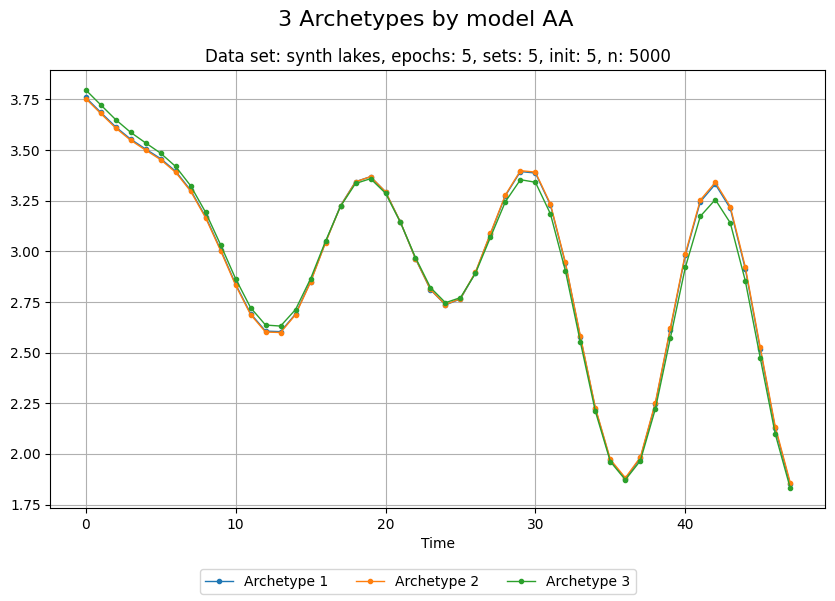

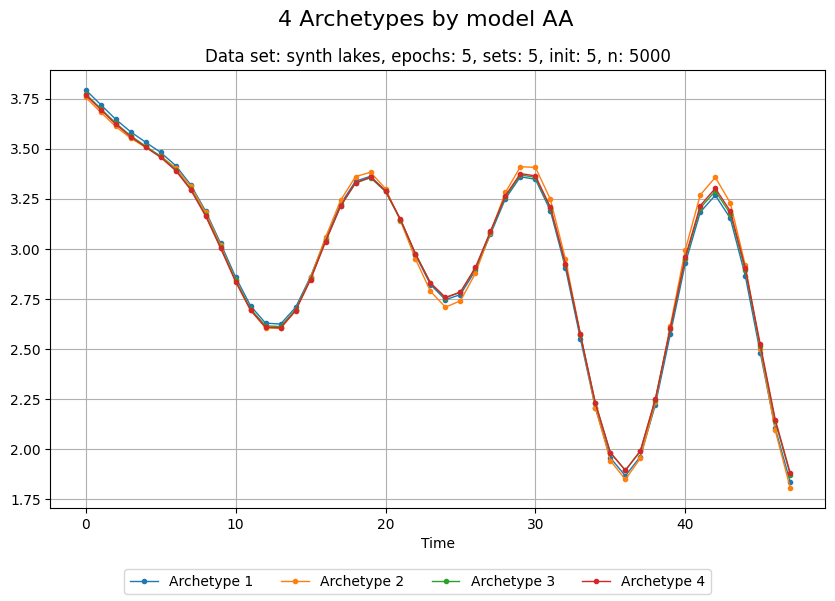

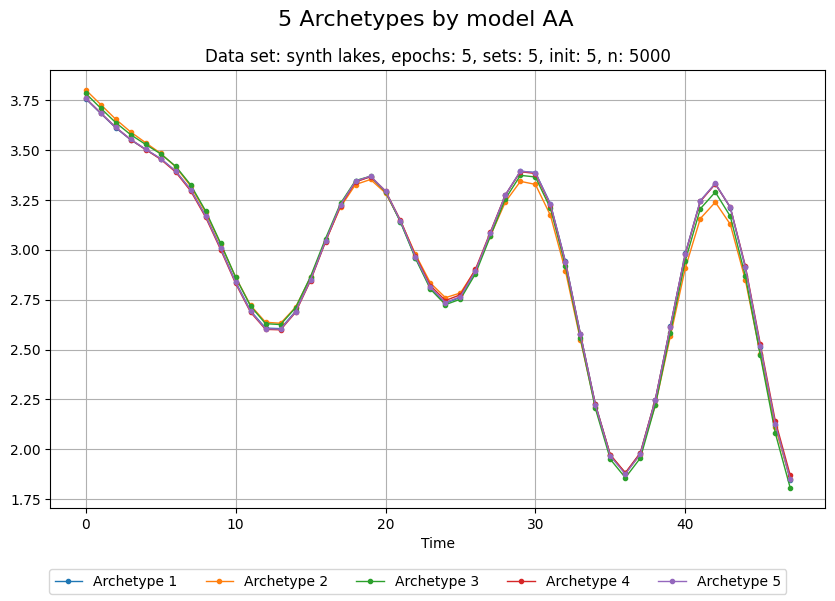

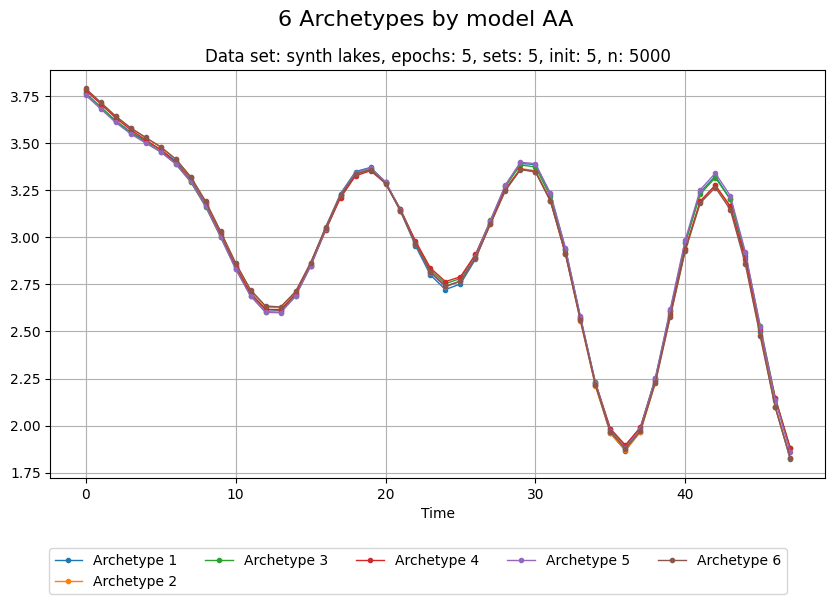

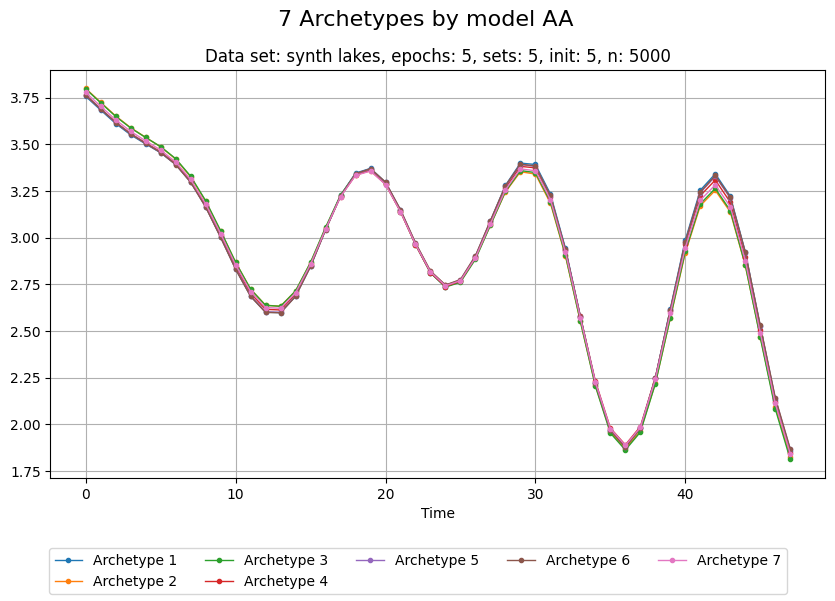

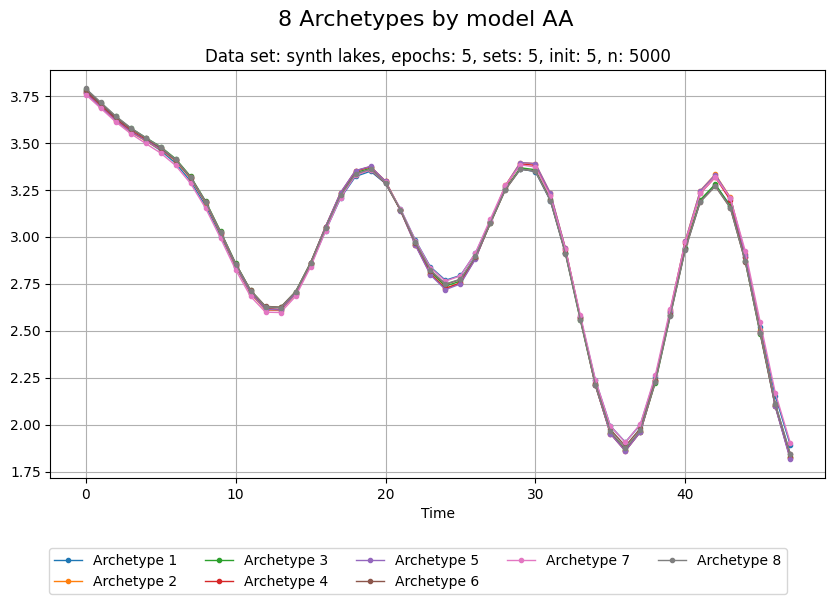

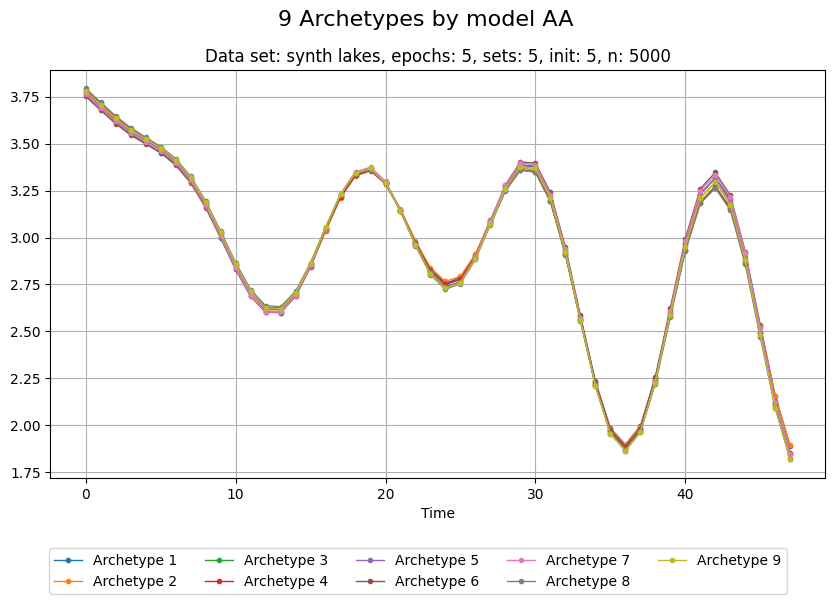

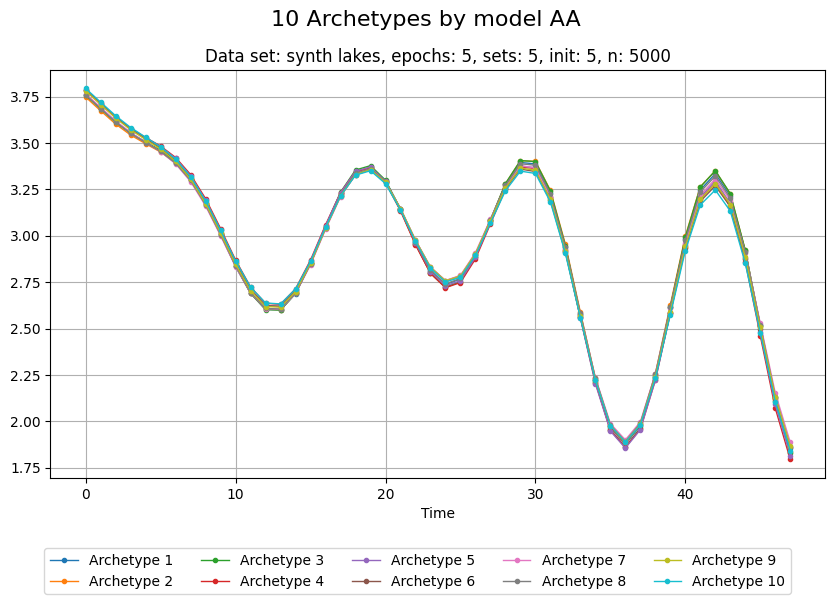

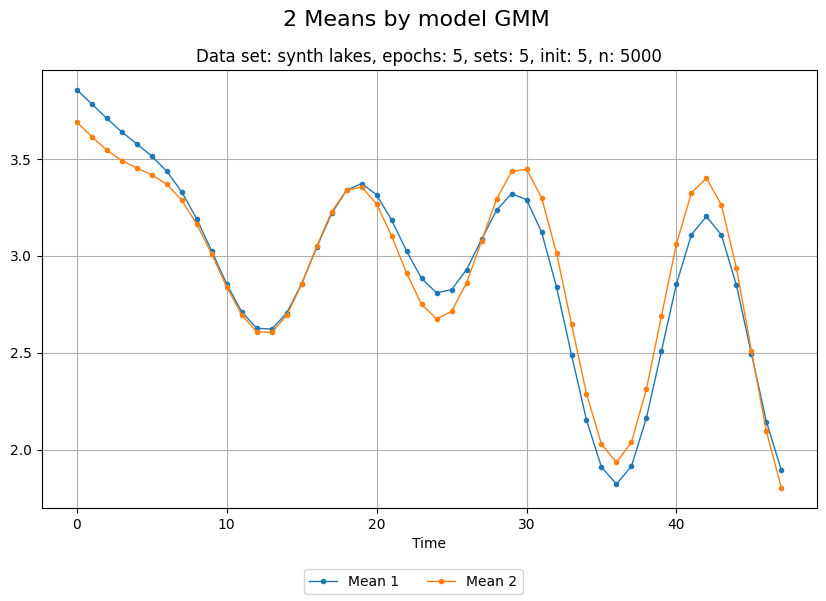

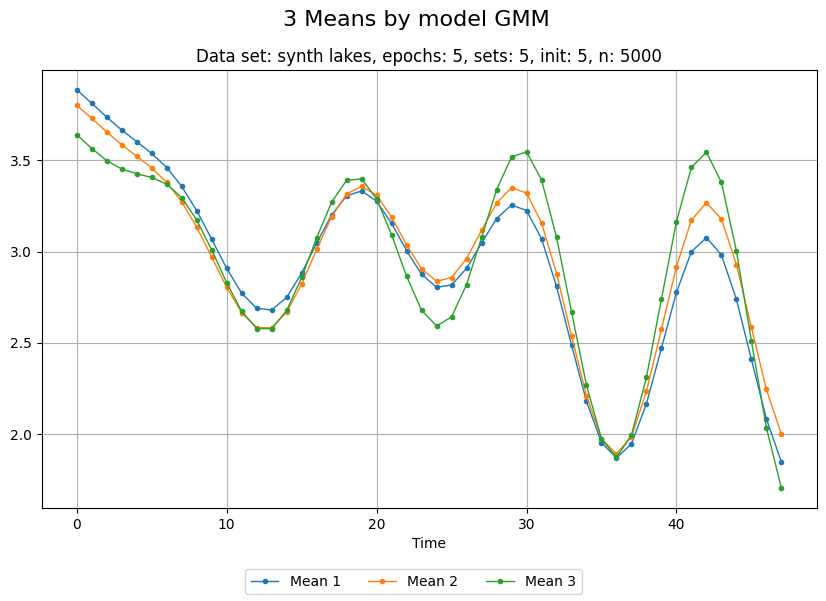

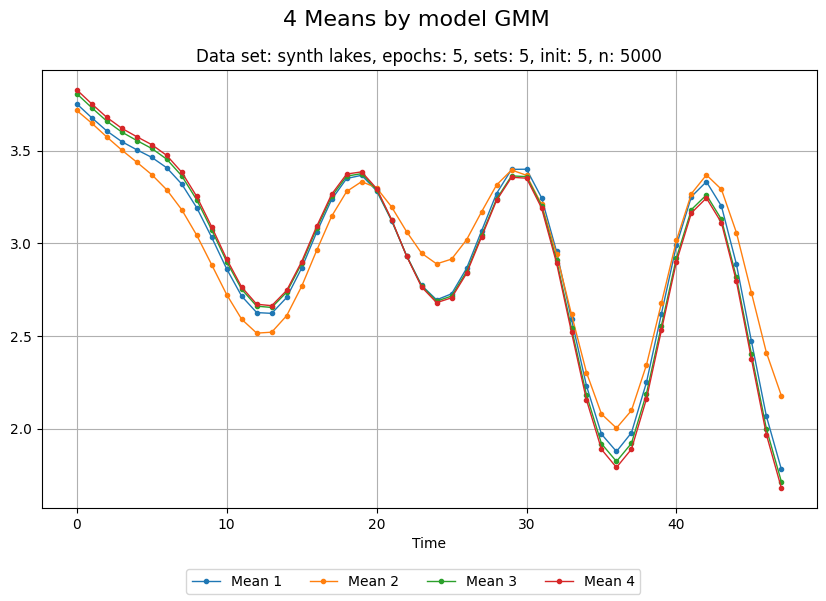

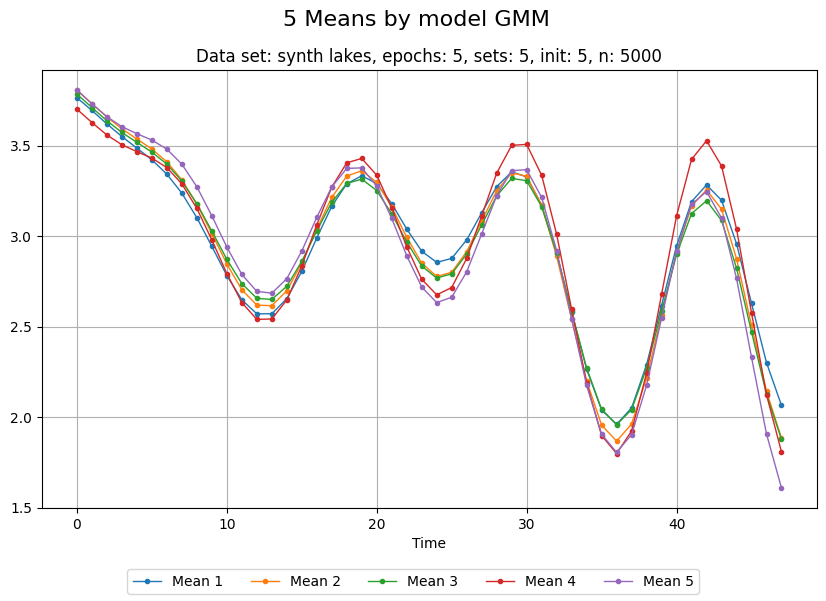

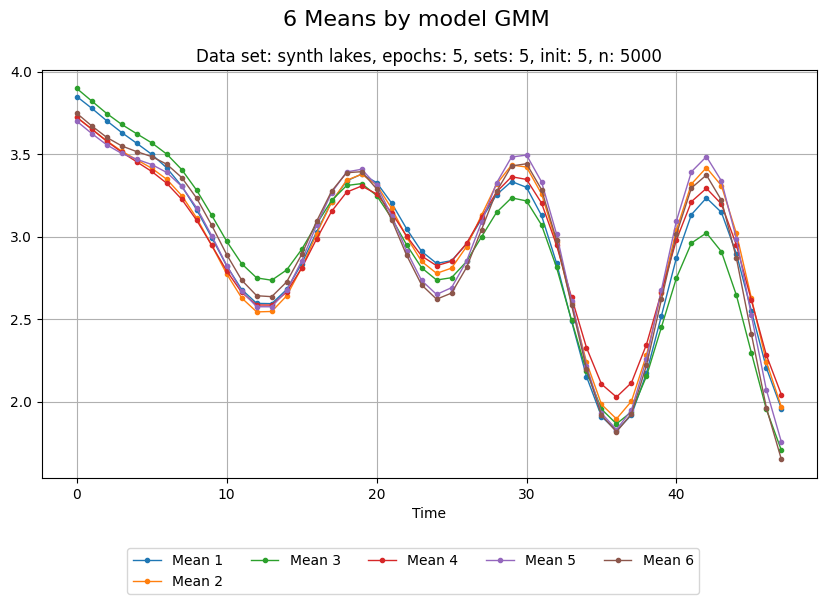

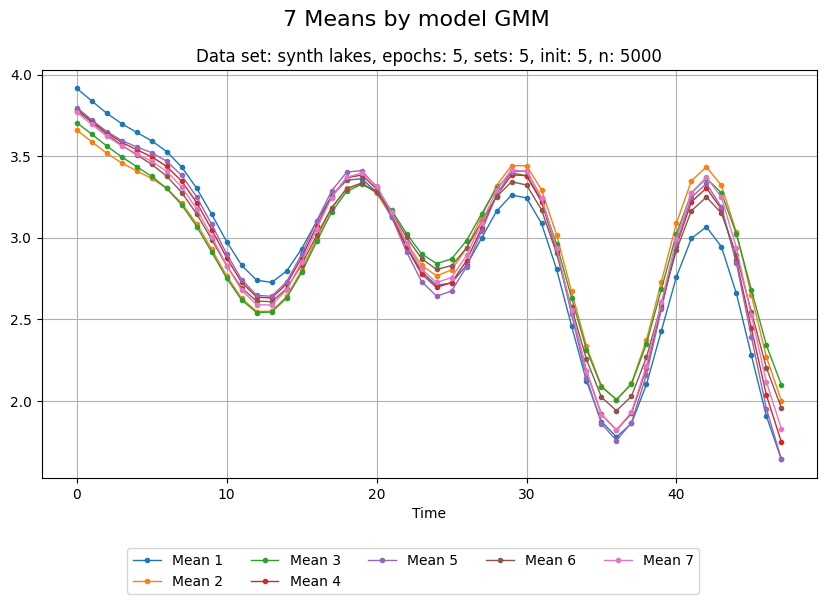

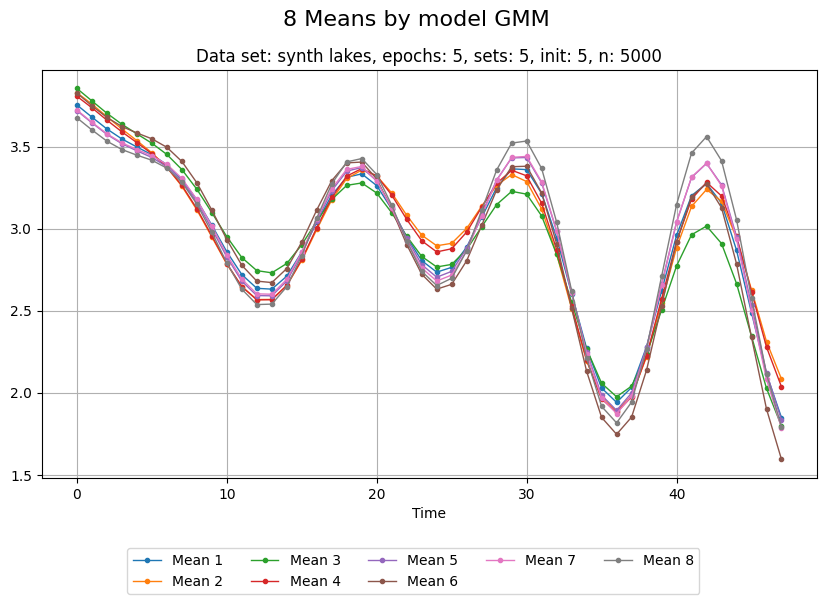

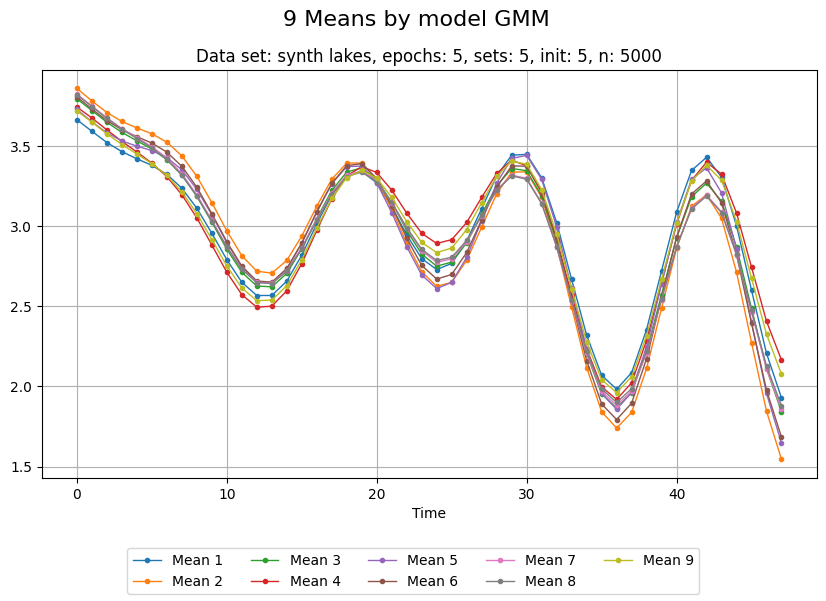

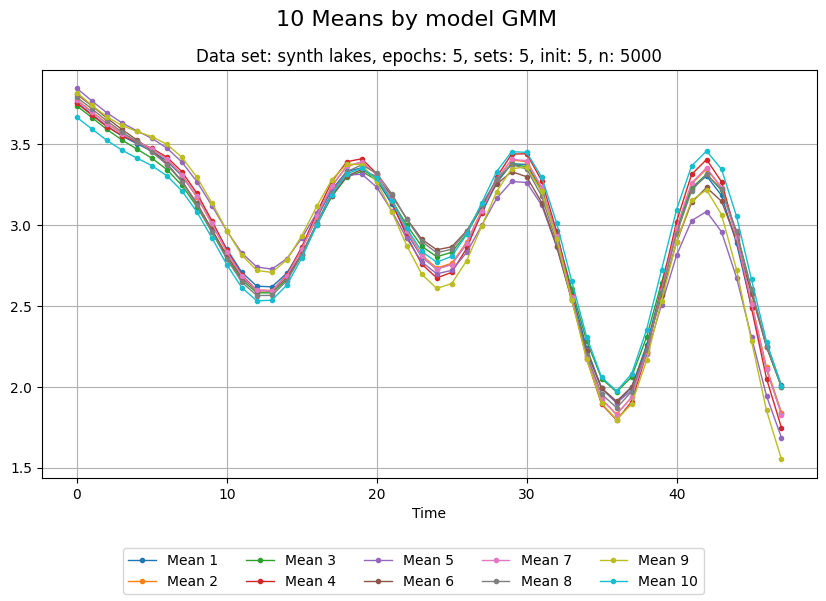

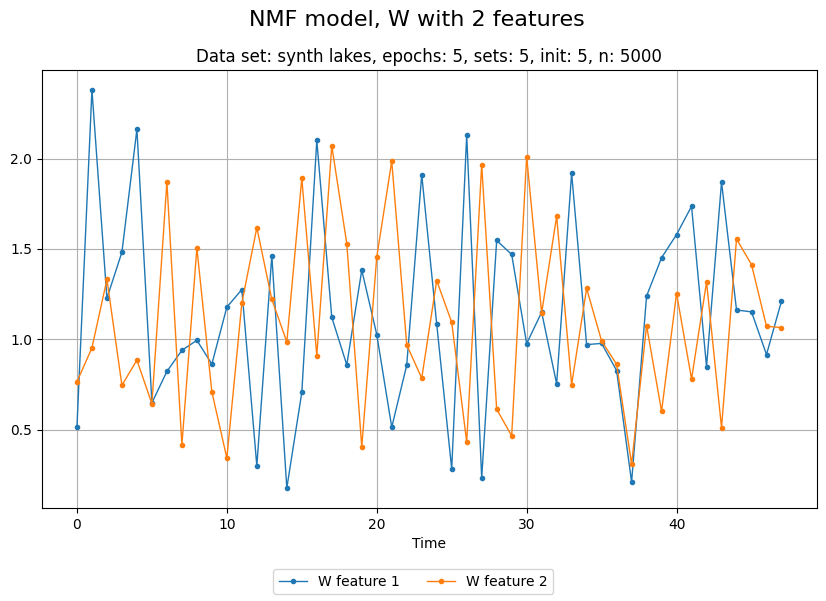

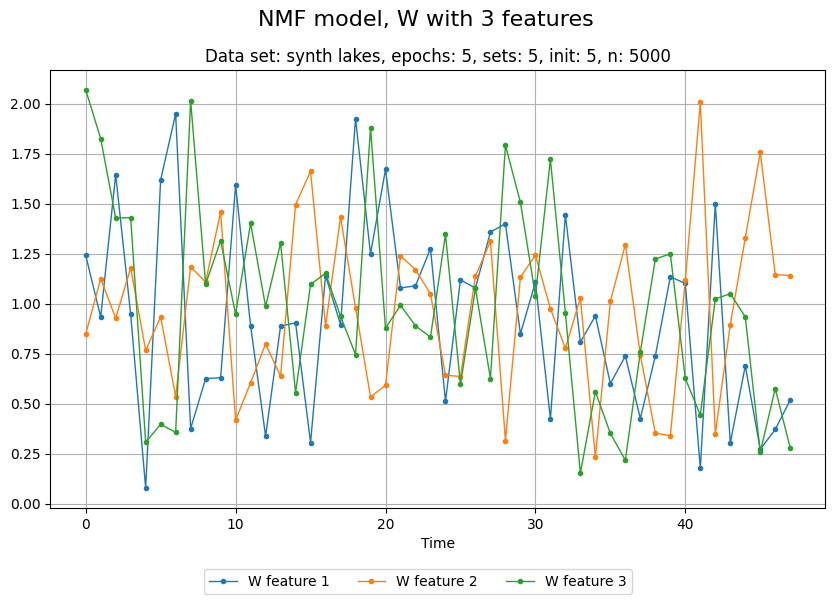

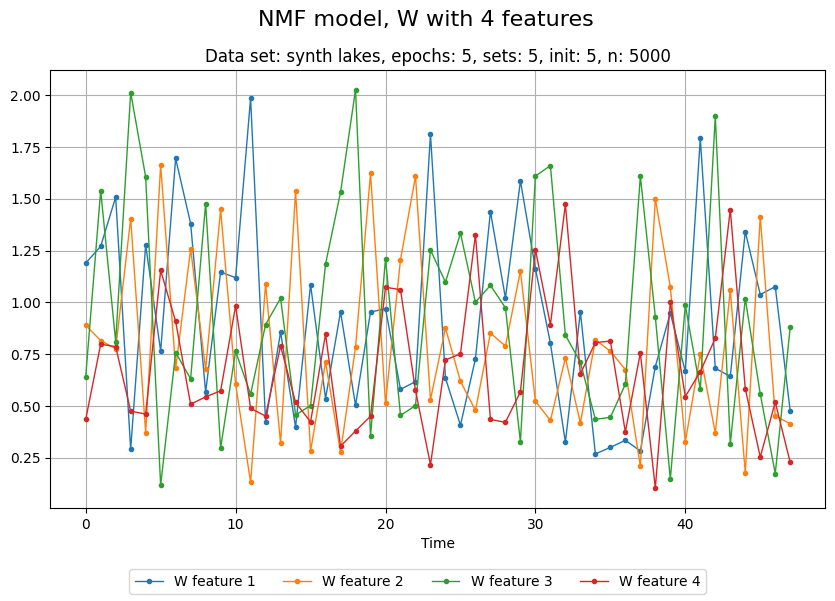

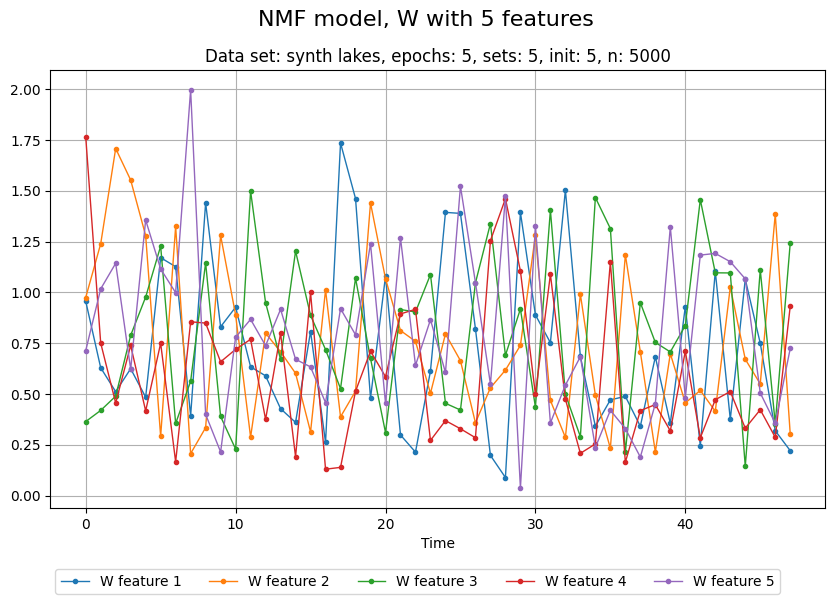

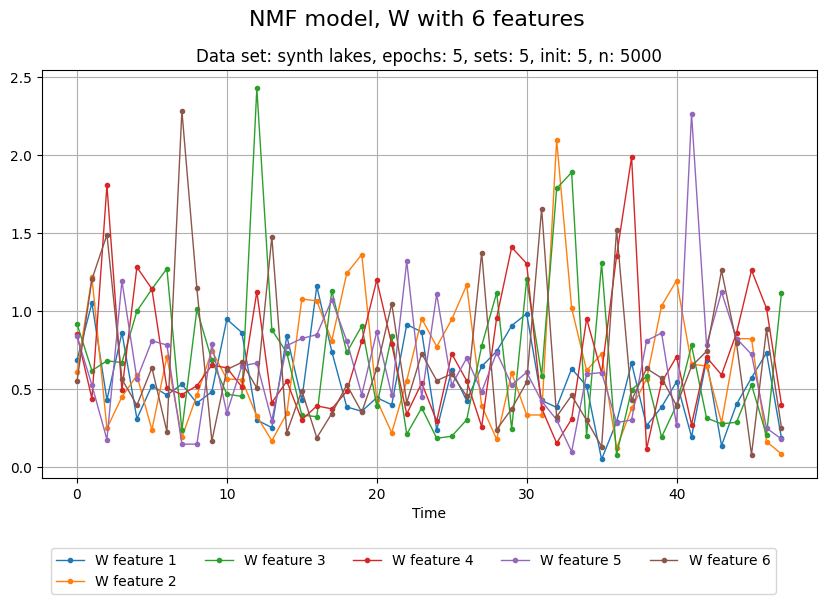

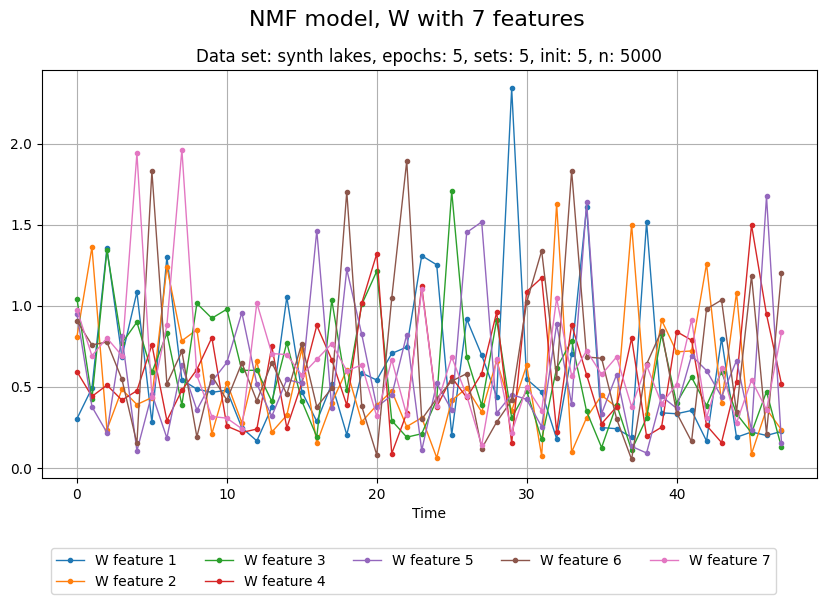

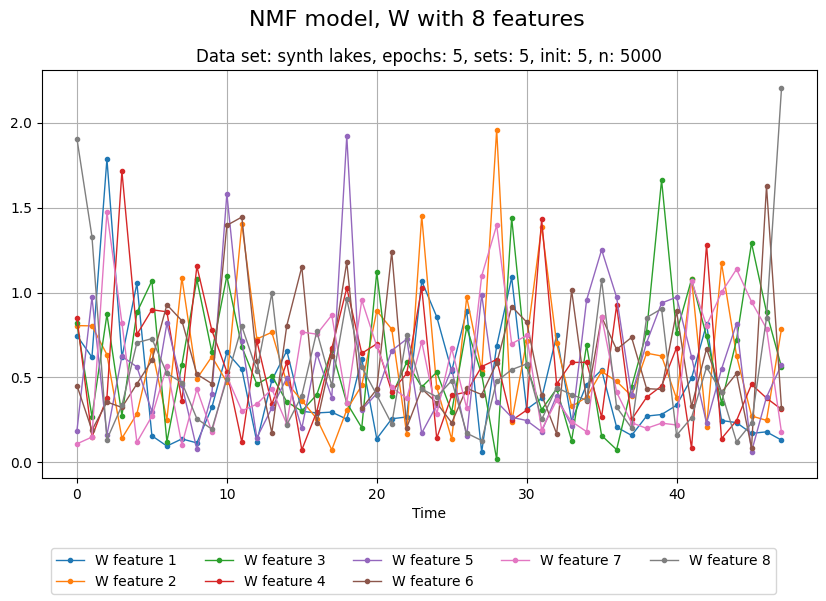

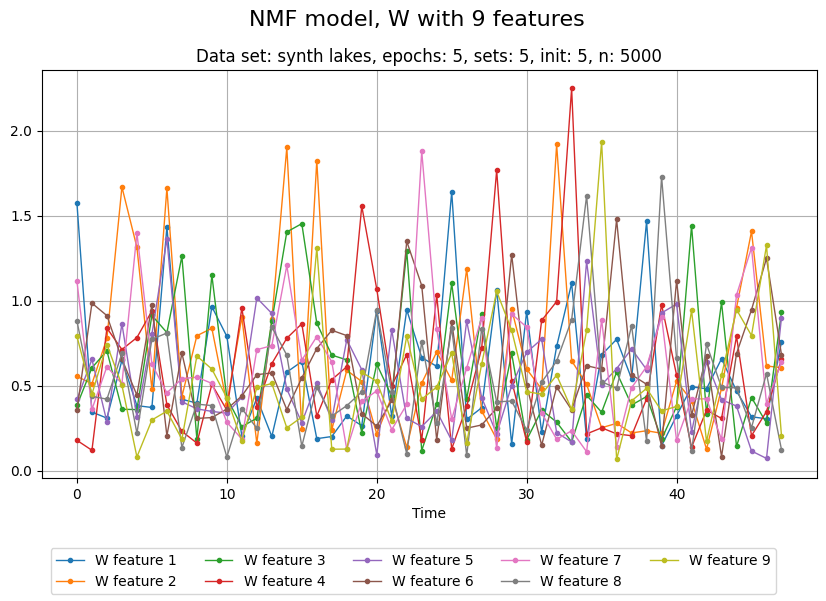

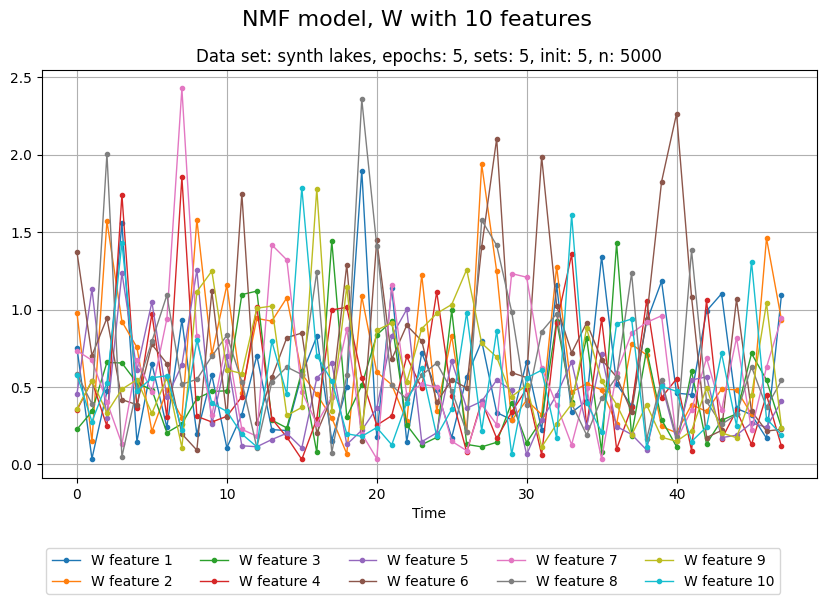

In [8]:
plot_loss(res, synth=True)
plot_loss_gmm(res, synth=True)
plot_loss_v_epoch(res, synth=True)
plot_GMM_converge(res)
plot_NMI_sets(res, synth=True)
plot_NMI_truth(res)
plot_test_data_sphere(res, archetypes)
save_arc_csv(res)
save_H_csv(res)
save_GMM_csv(res)
plot_lake_archetypes(res)#, archetypes)
plot_lake_means(res, archetypes=None)
plot_lake_NMF(res, archetypes=None)